In [2]:
import jupyter_black

jupyter_black.load()

In [3]:
import pandas as pd
import seaborn as sns
from pathlib import Path
from matplotlib import pyplot as plt

project_dir = Path().resolve().parents[0]

In [11]:
# Load the datasets
user_list = pd.read_csv(
    project_dir
    / "data"
    / "raw"
    / "business_data_analyst_tech_challenge_2023_h2_user_data.csv"
)
transaction_summary = pd.read_csv(
    project_dir
    / "data"
    / "raw"
    / "business_data_analyst_tech_challenge_2023_h2_transaction_data.csv"
)

In [12]:
# Convert the columns into datetime columns
user_list["phone_registered_at"] = pd.to_datetime(user_list["phone_registered_at"])
user_list["verified_at"] = pd.to_datetime(user_list["verified_at"])
user_list["overall_first_deposit_timestamp"] = pd.to_datetime(
    user_list["overall_first_deposit_timestamp"]
)
transaction_summary["timestamp"] = pd.to_datetime(transaction_summary["timestamp"])

In [18]:
# Extract users who invested in the Web3 Thematic
web3_investors = transaction_summary[
    transaction_summary["web3_thematic_purchase_usd"].notna()
]["user_id"].unique()
web3_investor_data = user_list[user_list["user_id"].isin(web3_investors)]

# Extract the total number of users who started onboarding during 2023 H1
total_users = user_list["user_id"].nunique()

# Calculate the percentage of users who invested in the Web3 Thematic
web3_adoption_rate = len(web3_investors) / total_users * 100

# Project the number of users for the Golden Thematic based on the Web3 Thematic adoption rate
pessimistic_multiplier = 0.5
realistic_multiplier = 0.75
optimistic_multiplier = 1

pessimistic_projection = (
    total_users * (web3_adoption_rate * pessimistic_multiplier) / 100
)
realistic_projection = total_users * (web3_adoption_rate * realistic_multiplier) / 100
optimistic_projection = total_users * (web3_adoption_rate * optimistic_multiplier) / 100

pessimistic_projection, realistic_projection, optimistic_projection

(839.5, 1259.25, 1679.0)

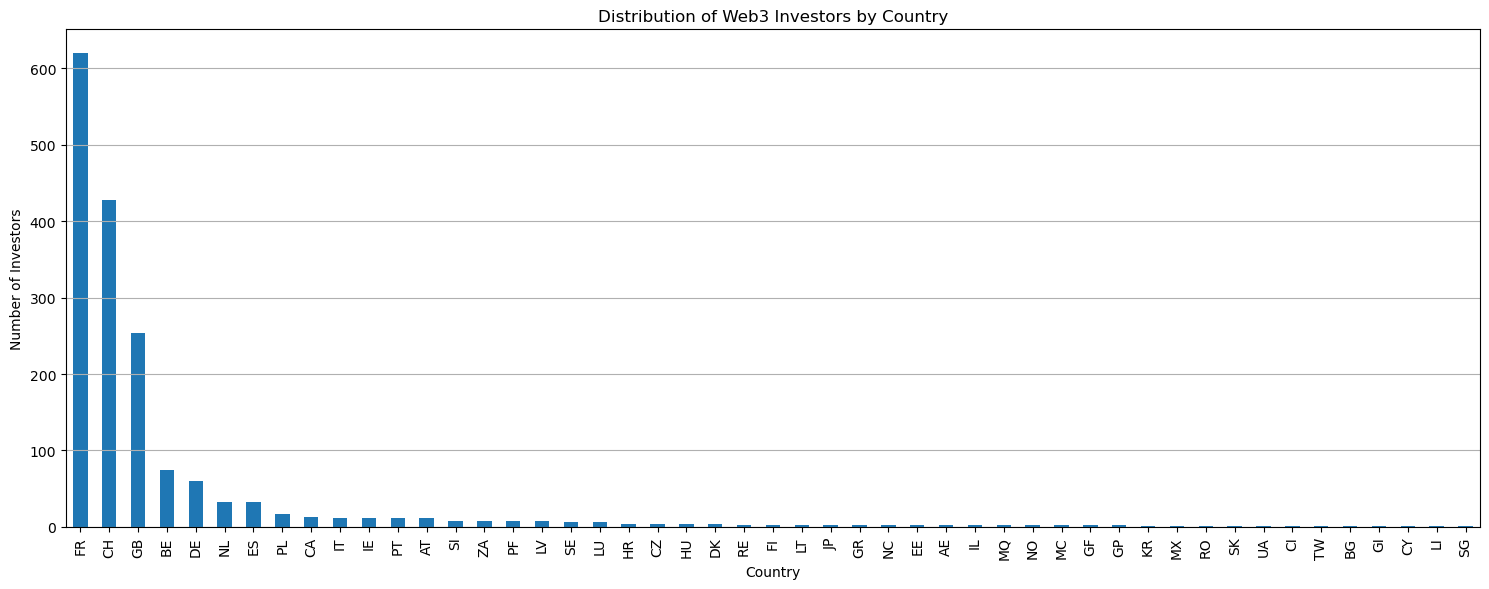

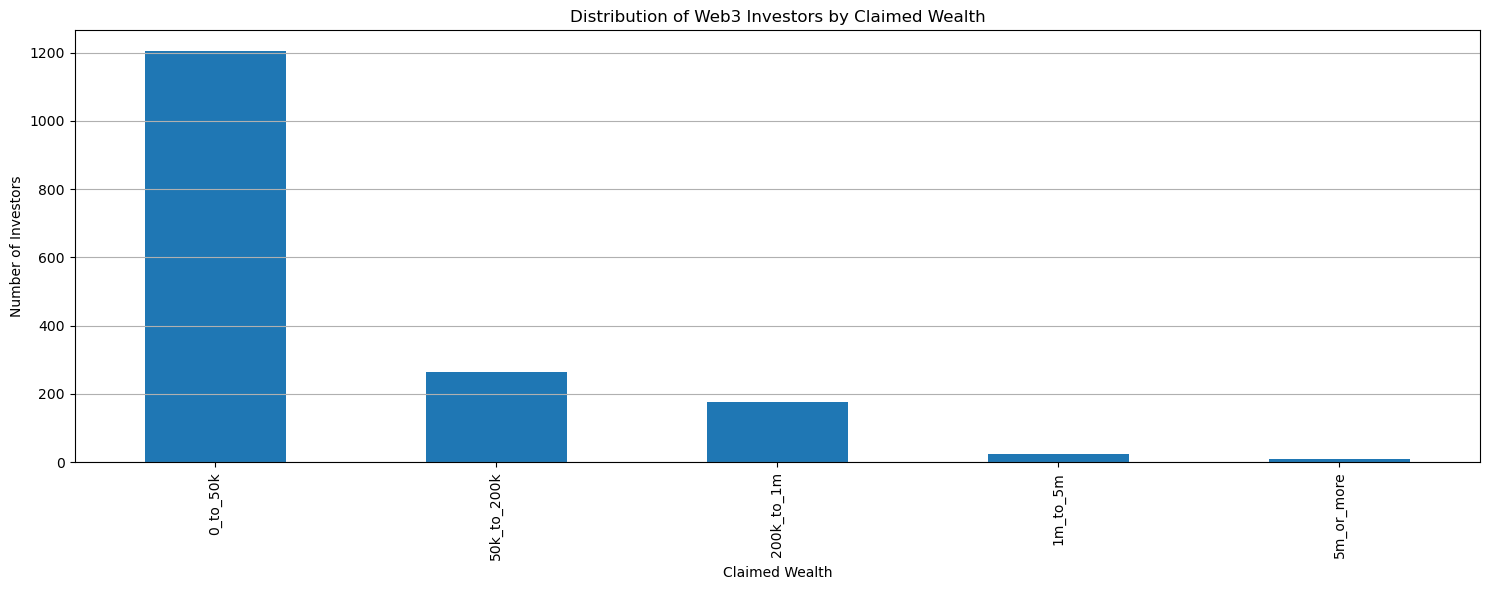

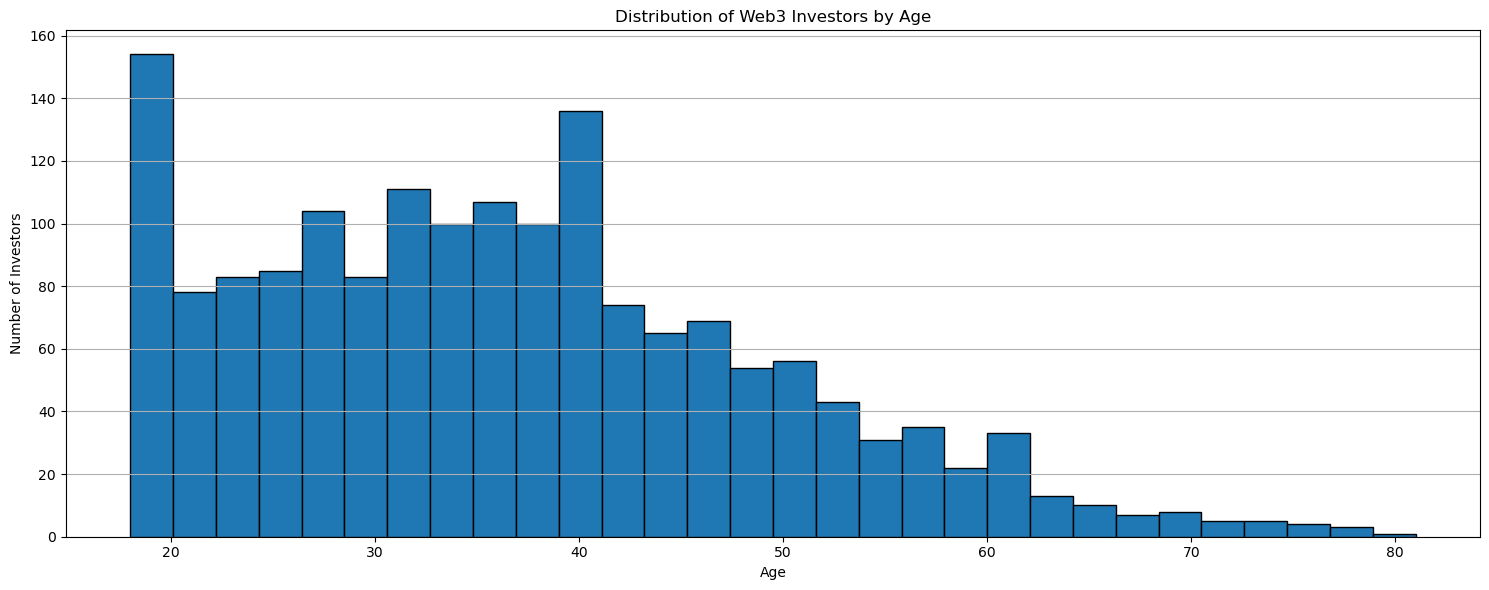

In [14]:
# Visualize user segmentation based on the Web3 Thematic data

# Distribution by Country
plt.figure(figsize=(15, 6))
web3_investor_data["country_code"].value_counts().plot(kind="bar")
plt.title("Distribution of Web3 Investors by Country")
plt.ylabel("Number of Investors")
plt.xlabel("Country")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

# Distribution by Claimed Wealth
plt.figure(figsize=(15, 6))
web3_investor_data["total_claimed_wealth_usd"].value_counts().plot(kind="bar")
plt.title("Distribution of Web3 Investors by Claimed Wealth")
plt.ylabel("Number of Investors")
plt.xlabel("Claimed Wealth")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

# Distribution by Age
plt.figure(figsize=(15, 6))
web3_investor_data["age"].plot(kind="hist", bins=30, edgecolor="black")
plt.title("Distribution of Web3 Investors by Age")
plt.ylabel("Number of Investors")
plt.xlabel("Age")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

In [15]:
# Calculate the number of users who invested in the Golden Thematic a week after its release
launch_date = transaction_summary[
    transaction_summary["golden_thematic_purchase_usd"].notna()
]["timestamp"].min()
end_date = pd.to_datetime(launch_date) + pd.Timedelta(weeks=1)

# Filter the data for one week after the launch
week_after_launch_data = transaction_summary[
    (transaction_summary["timestamp"] >= launch_date)
    & (transaction_summary["timestamp"] <= end_date)
]

# Calculate the number of users who invested in the Golden Thematic during this period
golden_thematic_users = week_after_launch_data[
    week_after_launch_data["golden_thematic_purchase_usd"].notna()
]["user_id"].nunique()

golden_thematic_users

386

In [16]:
# Extract users who invested in Golden Thematic within the first week of its launch
golden_thematic_investors = week_after_launch_data[
    week_after_launch_data["golden_thematic_purchase_usd"].notna()
]["user_id"].unique()
golden_investor_data = user_list[user_list["user_id"].isin(golden_thematic_investors)]

# Extract users who invested in Web3 Thematic within the first week of its launch
web3_launch_date = transaction_summary[
    transaction_summary["web3_thematic_purchase_usd"].notna()
]["timestamp"].min()
web3_end_date = pd.to_datetime(web3_launch_date) + pd.Timedelta(weeks=1)
week_after_web3_launch_data = transaction_summary[
    (transaction_summary["timestamp"] >= web3_launch_date)
    & (transaction_summary["timestamp"] <= web3_end_date)
]
web3_investors_first_week = week_after_web3_launch_data[
    week_after_web3_launch_data["web3_thematic_purchase_usd"].notna()
]["user_id"].unique()
web3_investor_data_first_week = user_list[
    user_list["user_id"].isin(web3_investors_first_week)
]

In [17]:
# Compare the cohorts for Web3 and Golden Thematic by country, wealth, and age
def cohort_analysis(column):
    web3_counts = (
        web3_investor_data_first_week[column].value_counts(normalize=True) * 100
    )
    golden_counts = golden_investor_data[column].value_counts(normalize=True) * 100
    df = pd.concat([web3_counts, golden_counts], axis=1)
    df.columns = ["Web3 Thematic", "Golden Thematic"]
    df = df.fillna(0)
    return df


# By Country
country_cohort = cohort_analysis("country_code")

# By Wealth
wealth_cohort = cohort_analysis("total_claimed_wealth_usd")

# By Age
golden_investor_data["age_group"] = pd.cut(
    golden_investor_data["age"],
    bins=[0, 25, 35, 45, 60, 100],
    labels=["0-25", "25-35", "35-45", "45-60", "60+"],
)
web3_investor_data_first_week["age_group"] = pd.cut(
    web3_investor_data_first_week["age"],
    bins=[0, 25, 35, 45, 60, 100],
    labels=["0-25", "25-35", "35-45", "45-60", "60+"],
)
age_cohort = cohort_analysis("age_group")

country_cohort, wealth_cohort, age_cohort

C:\Users\Gent\AppData\Local\Temp\ipykernel_19776\2703932267.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  golden_investor_data["age_group"] = pd.cut(
C:\Users\Gent\AppData\Local\Temp\ipykernel_19776\2703932267.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  web3_investor_data_first_week["age_group"] = pd.cut(


(    Web3 Thematic  Golden Thematic
 FR      47.619048        37.564767
 CH      38.095238        27.979275
 GB       4.761905        13.730570
 RE       4.761905         0.259067
 BE       4.761905         3.367876
 DE       0.000000         4.922280
 CA       0.000000         2.331606
 ES       0.000000         1.813472
 AT       0.000000         1.036269
 PL       0.000000         1.036269
 IT       0.000000         1.036269
 LU       0.000000         1.036269
 SI       0.000000         0.518135
 RO       0.000000         0.518135
 LT       0.000000         0.518135
 NL       0.000000         0.259067
 EE       0.000000         0.259067
 MX       0.000000         0.259067
 IE       0.000000         0.259067
 PT       0.000000         0.259067
 SE       0.000000         0.259067
 PF       0.000000         0.259067
 GR       0.000000         0.259067
 JP       0.000000         0.259067,
              Web3 Thematic  Golden Thematic
 0_to_50k         76.190476        64.248705
 200k_to_